In [8]:
import pandas_oracle.tools as pt # pandas의 oracle DB 연결하는 패키지
import os # 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
os.putenv('NLS_LANG', '.UTF8')
conn = pt.open_connection('../oracle\config.yml')

In [9]:
#x :서비스 타입
#y :연령대별 판매건수

query1 = '''
SELECT *
FROM(SELECT 
       S_TYPE,
       AVG(TS_MALE_AMT) TS_MALE_AMT,
       AVG(TS_FEMALE_AMT) TS_FEMALE_AMT,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 SUMAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 1
      
Group By S_TYPE
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [10]:
#x :서비스 타입
#y :연령대별 판매건수

query2 = '''
SELECT *
FROM(SELECT 
       S_TYPE,
       AVG(TS_MALE_AMT) TS_MALE_AMT,
       AVG(TS_FEMALE_AMT) TS_FEMALE_AMT,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 SUMAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 2
      
Group By S_TYPE
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [11]:
#x :서비스 타입
#y :연령대별 판매건수

query3 = '''
SELECT *
FROM(SELECT 
       S_TYPE,
       AVG(TS_MALE_AMT) TS_MALE_AMT,
       AVG(TS_FEMALE_AMT) TS_FEMALE_AMT,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 SUMAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 3
      
Group By S_TYPE
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [12]:
#x :서비스 타입
#y :연령대별 판매건수

query4 = '''
SELECT *
FROM(SELECT 
       S_TYPE,
       AVG(TS_MALE_AMT) TS_MALE_AMT,
       AVG(TS_FEMALE_AMT) TS_FEMALE_AMT,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 SUMAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 4
      
Group By S_TYPE
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [13]:
df_query1_age = pt.query_to_df(query1, conn, 1000000)
df_query2_age = pt.query_to_df(query2, conn, 1000000)
df_query3_age = pt.query_to_df(query3, conn, 1000000)
df_query4_age = pt.query_to_df(query4, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)

Text(0, 0.5, '평균판매액')

<Figure size 432x288 with 0 Axes>

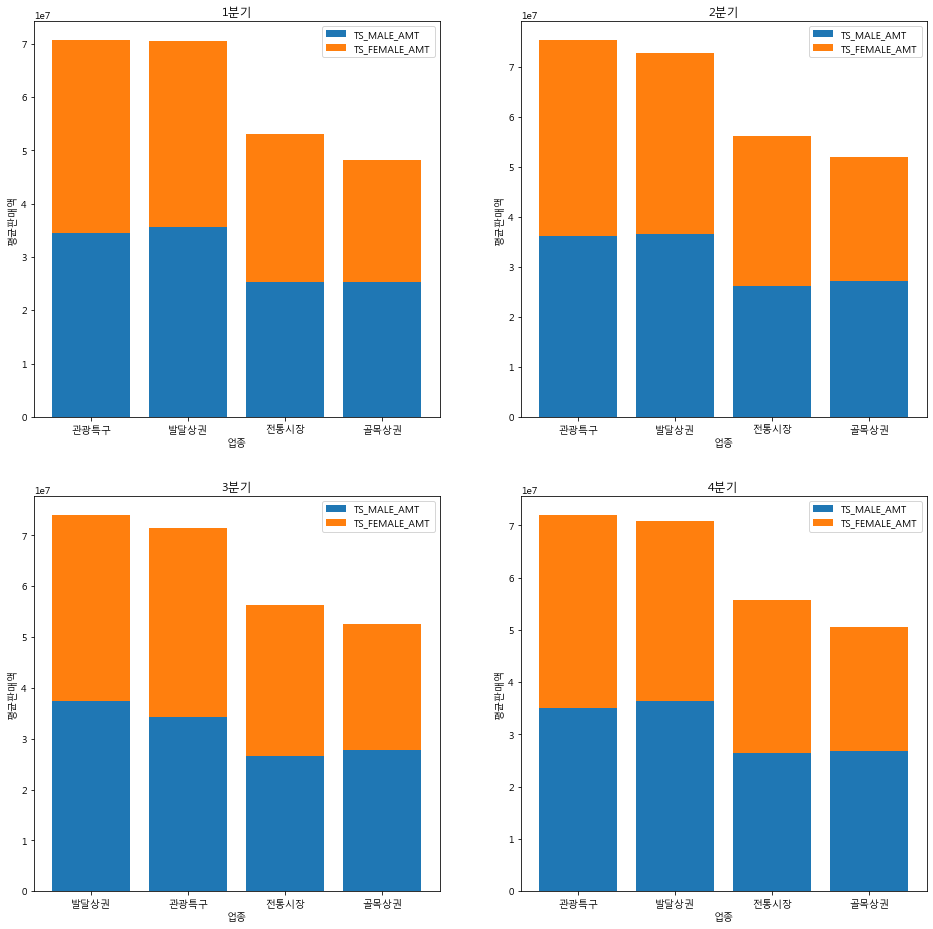

In [14]:
fig = plt.figure()
fig = plt.figure(figsize=(16, 16)) 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(df_query1_age ['S_TYPE'], df_query1_age ['TS_MALE_AMT'], label='TS_MALE_AMT')
ax1.bar(df_query1_age ['S_TYPE'], df_query1_age ['TS_FEMALE_AMT'], label='TS_FEMALE_AMT' , bottom =  df_query1_age ['TS_MALE_AMT'] )

ax1.legend(loc='upper right')

ax1.set_title('1분기')
ax1.set_xlabel('업종')
ax1.set_ylabel('평균판매액')
               
ax2.bar(df_query2_age ['S_TYPE'], df_query2_age ['TS_MALE_AMT'], label='TS_MALE_AMT')
ax2.bar(df_query2_age ['S_TYPE'], df_query2_age ['TS_FEMALE_AMT'], label='TS_FEMALE_AMT' , bottom =  df_query2_age ['TS_MALE_AMT'] )

ax2.legend(loc='upper right')

ax2.set_title('2분기')
ax2.set_xlabel('업종')
ax2.set_ylabel('평균판매액')

ax3.bar(df_query3_age ['S_TYPE'], df_query3_age ['TS_MALE_AMT'], label='TS_MALE_AMT')
ax3.bar(df_query3_age ['S_TYPE'], df_query3_age ['TS_FEMALE_AMT'], label='TS_FEMALE_AMT' , bottom =  df_query3_age ['TS_MALE_AMT'] )
ax3.legend(loc='upper right')

ax3.set_title('3분기')
ax3.set_xlabel('업종')
ax3.set_ylabel('평균판매액')


ax4.bar(df_query4_age ['S_TYPE'], df_query4_age ['TS_MALE_AMT'], label='TS_MALE_AMT')
ax4.bar(df_query4_age ['S_TYPE'], df_query4_age ['TS_FEMALE_AMT'], label='TS_FEMALE_AMT' , bottom =  df_query4_age ['TS_MALE_AMT'] )
ax4.legend(loc='upper right')


ax4.set_title('4분기')
ax4.set_xlabel('업종')
ax4.set_ylabel('평균판매액')

In [7]:
#편의점,의료순으로 매출이 많다
#편의점에서는 20~30대 매출이 많으므로 입지 위치를
#대학이나 회사상권으로 하는것이 좋다
#3분기에서는 편의점 ->의료 -> 가구 
#4분기 편의점->일반의원->치과의원으로 변화
#그이유는 감기로 인한 일반감기로 인한 이유인거 같다